## Student Performance Indicator

#### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose the Best Model

### 1) Problem Statement
- This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course.


### 2) Data Collection
- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [8]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender : sex of students -> (Male/Female)
- race_ethicity : ethnicity of students -> (Group A, B, C, D, E)
- parental_level_of_education : parents' Highest level of eduction -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : Having lunch before test (standard or free/reduced)
- test_preparation_course : complete or not complete before test
- math_score
- reading_score
- writing_score

### 3. Data Checks to perform
1. Check Missing Values
2. Check duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories presents in the different categorical column

#### 3.1 Check Missing Values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the dataset

#### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicates values in the dataset

#### 3.3 Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 69
- All standard devations are also close - between 14.60 and 15.19
- While there is minimum score 0 for math, for writing minimum is much higher = 10 and for reading = 17

#### 3.7 Exploring Data

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_enthnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' varaible:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_enthnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' varaible:   ['none' 'completed']


In [19]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [20]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = df['total_score']/3
df.head() 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

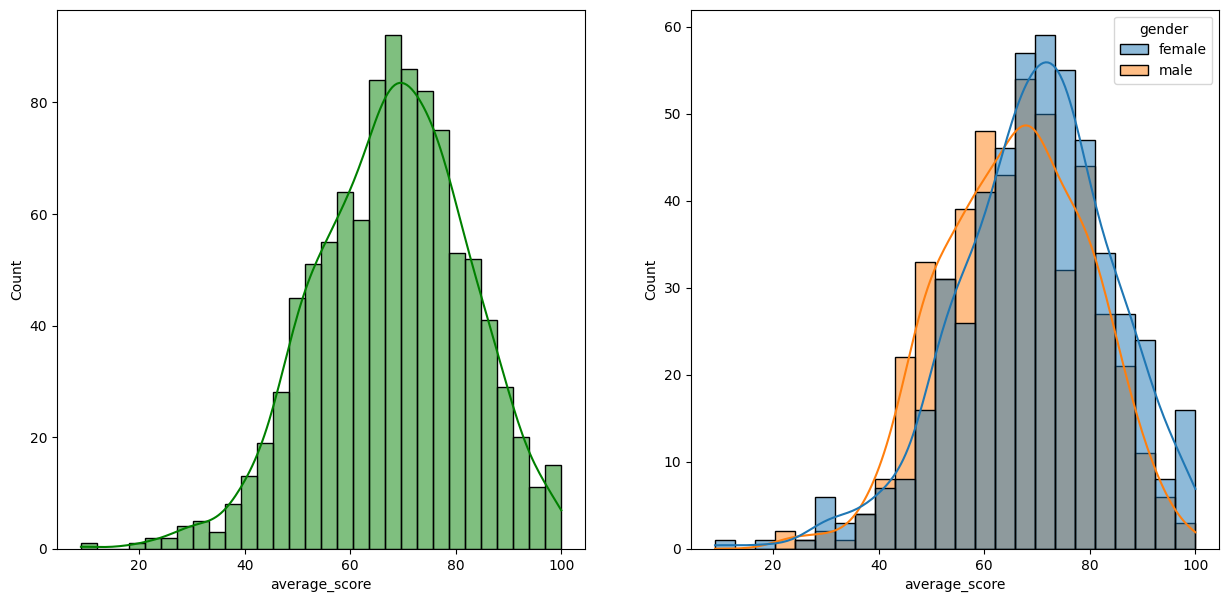

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

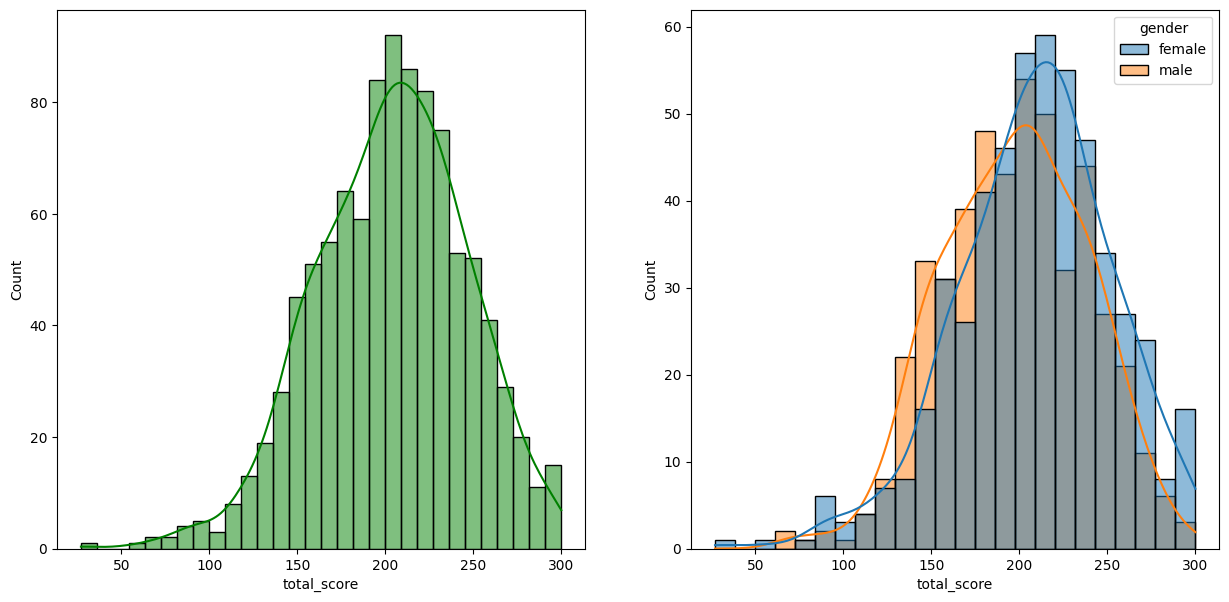

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

##### Insights

- Female students tend to perform well then male students

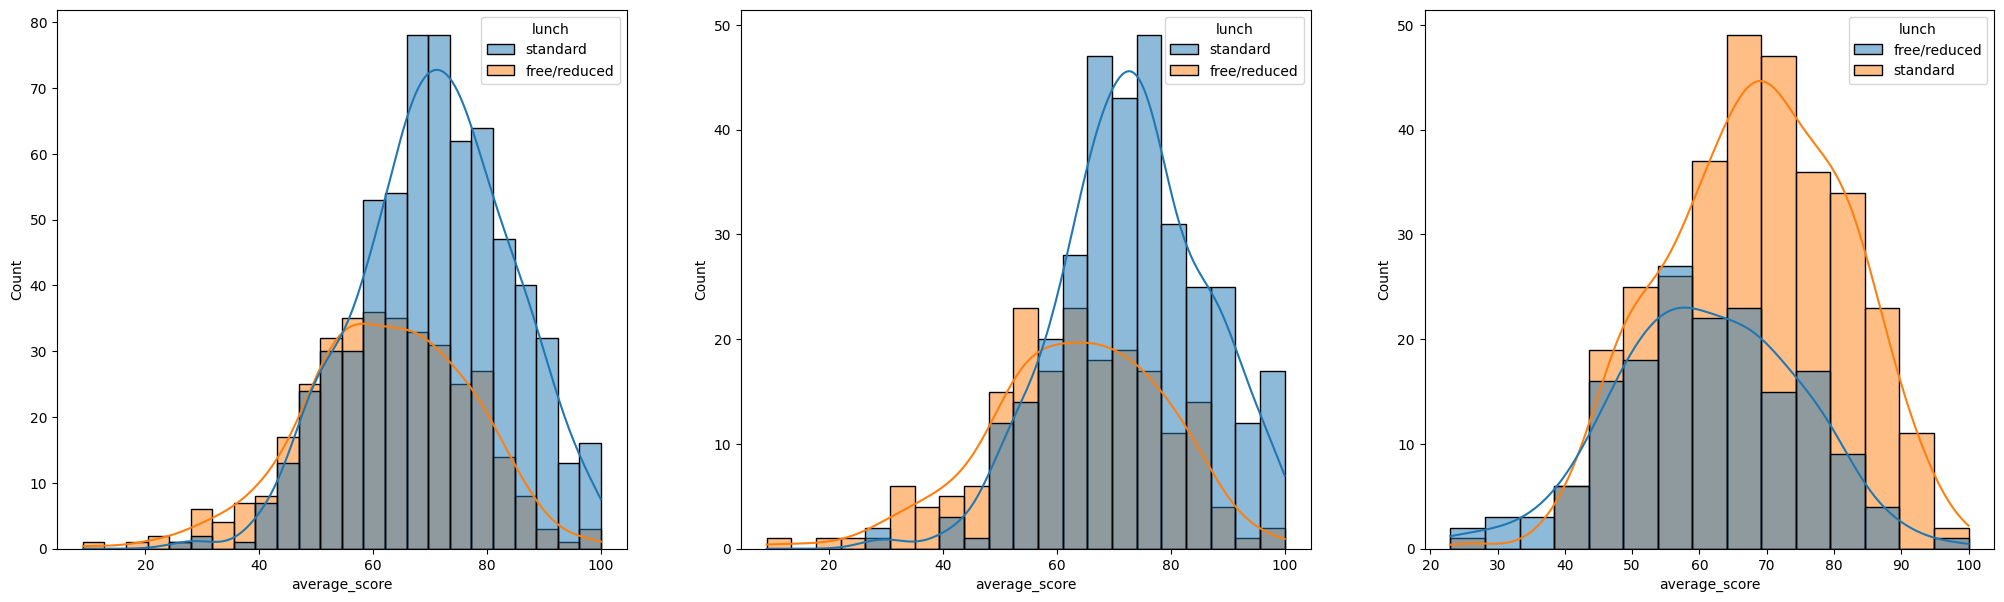

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.show()

##### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female

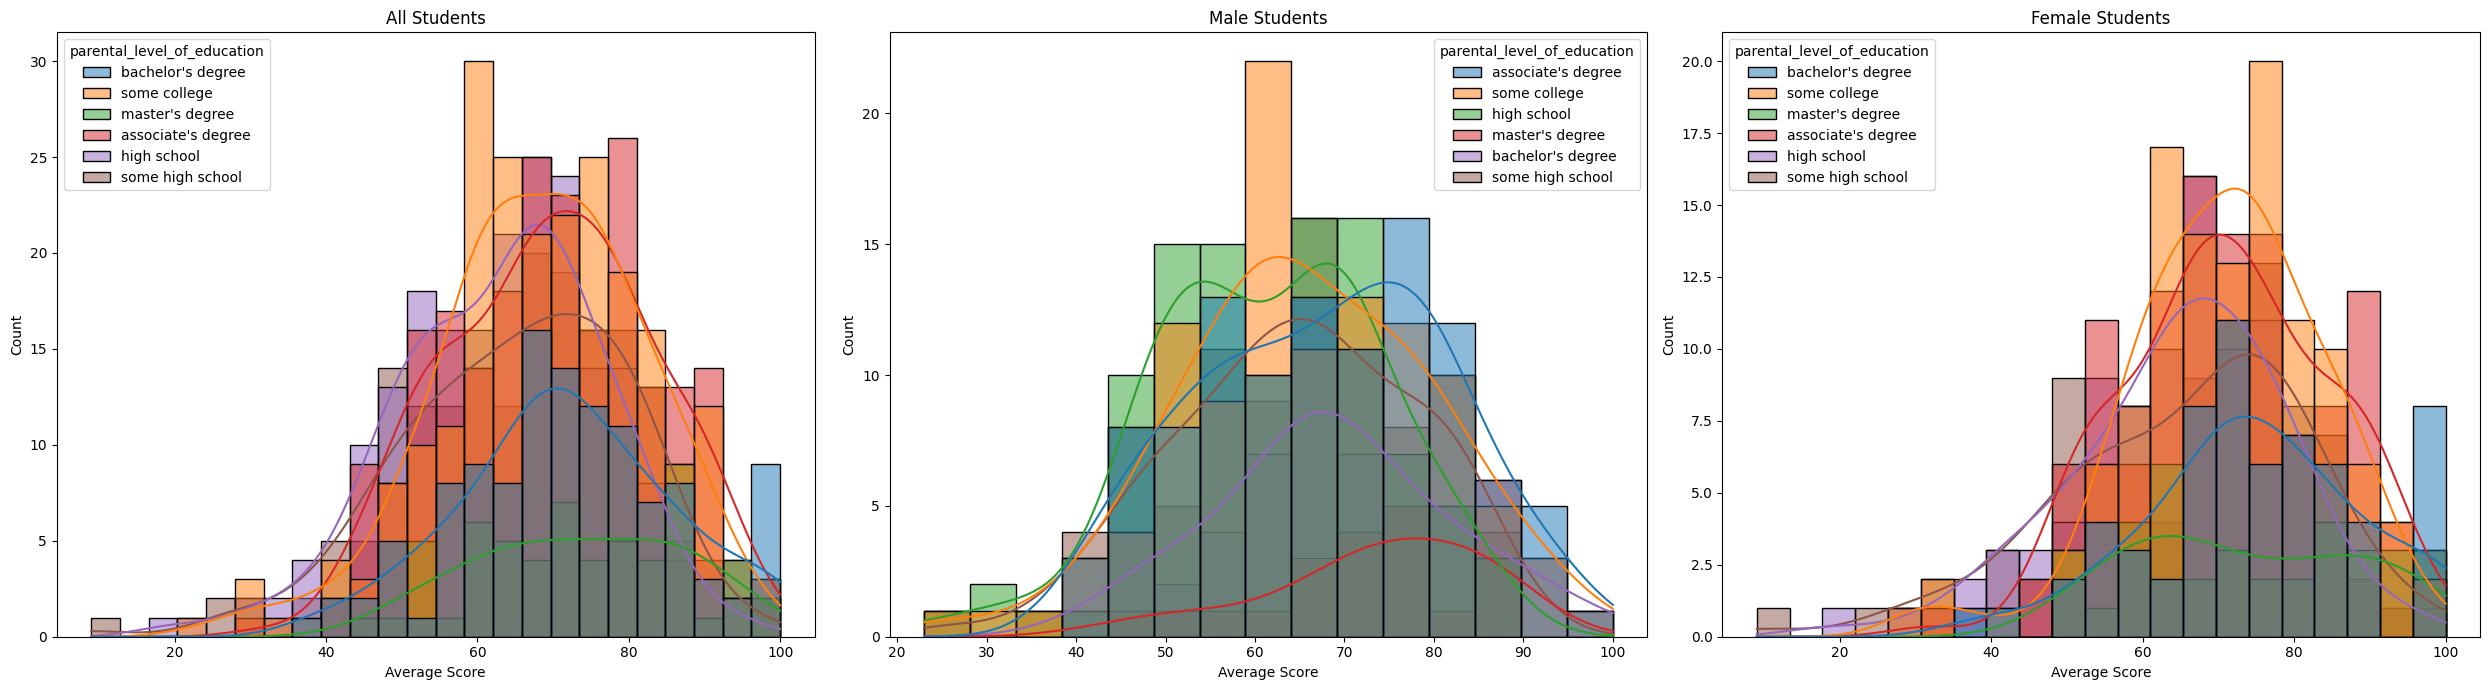

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
sns.histplot(
    data=df,
    x='average_score',
    kde=True,
    hue='parental_level_of_education'
    ,ax=axs[0]
)
axs[0].set_title('All Students')
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Count')

sns.histplot(
    data=df[df.gender=='male'],
    x='average_score',
    kde=True,
    hue='parental_level_of_education',
    ax=axs[1]
)
axs[1].set_title('Male Students')
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Count')

sns.histplot(
    data=df[df.gender=='female'],
    x='average_score',
    kde=True,
    hue='parental_level_of_education',
    ax=axs[2]
)
axs[2].set_title('Female Students')
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

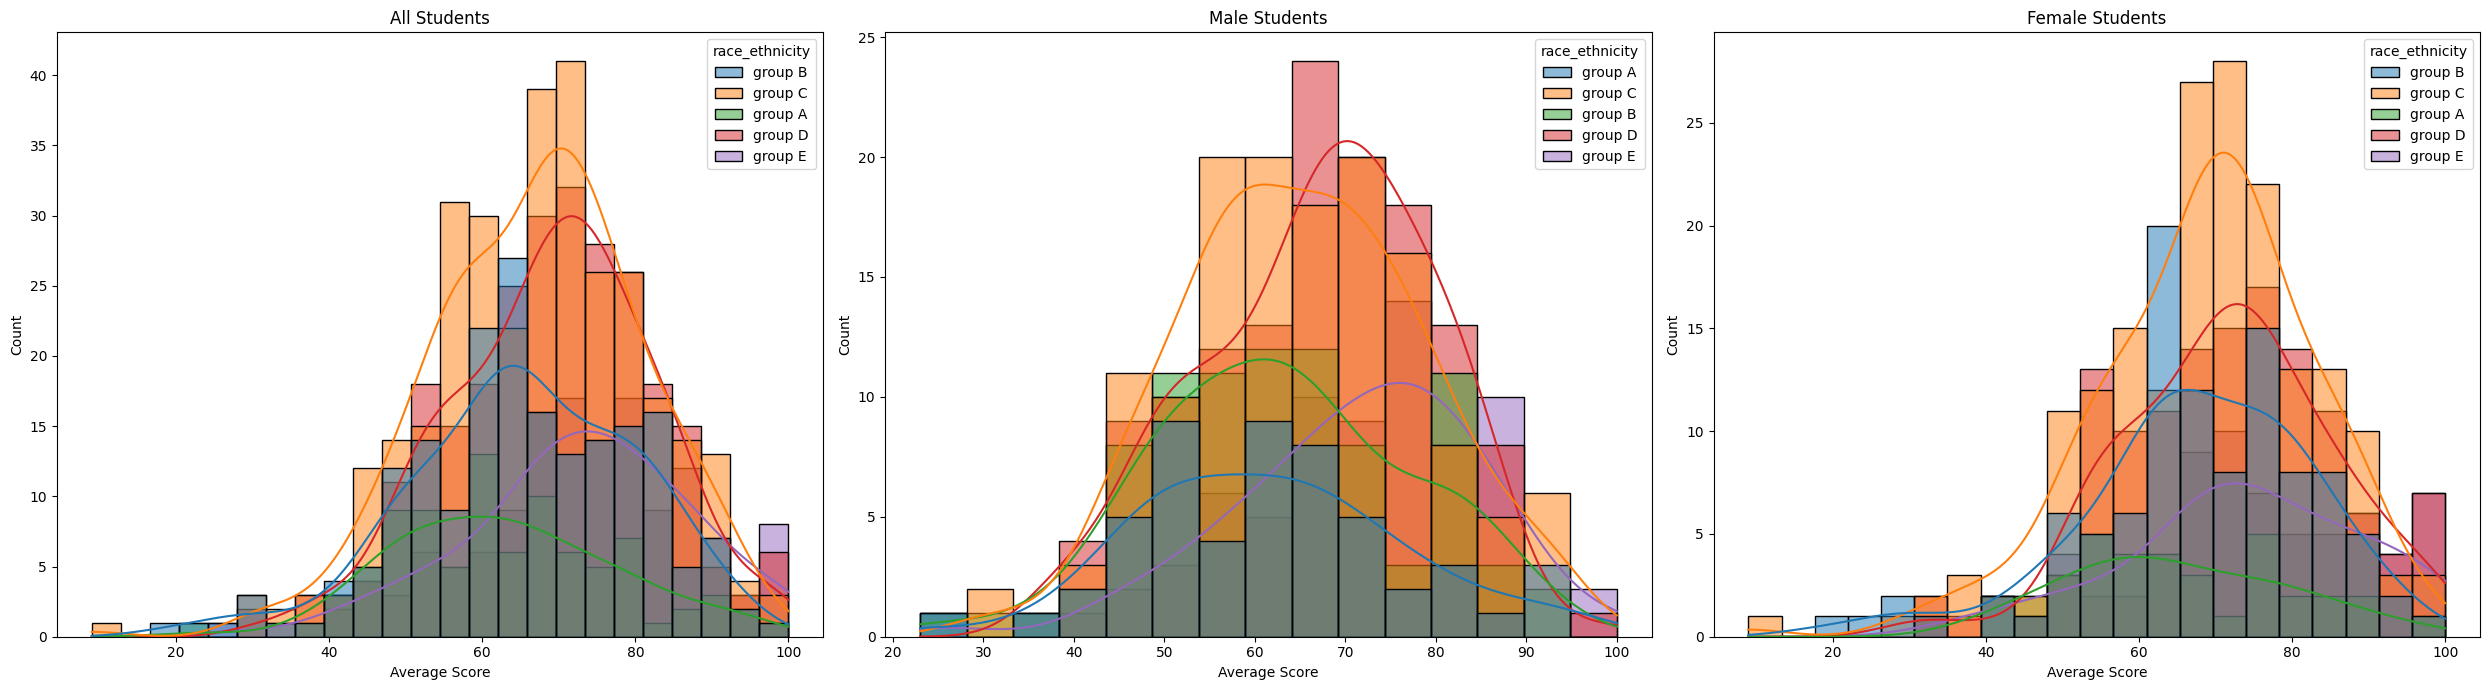

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
sns.histplot(
    data=df,
    x='average_score',
    kde=True,
    hue='race_ethnicity'
    ,ax=axs[0]
)
axs[0].set_title('All Students')
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Count')

sns.histplot(
    data=df[df.gender=='male'],
    x='average_score',
    kde=True,
    hue='race_ethnicity',
    ax=axs[1]
)
axs[1].set_title('Male Students')
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Count')

sns.histplot(
    data=df[df.gender=='female'],
    x='average_score',
    kde=True,
    hue='race_ethnicity',
    ax=axs[2]
)
axs[2].set_title('Female Students')
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

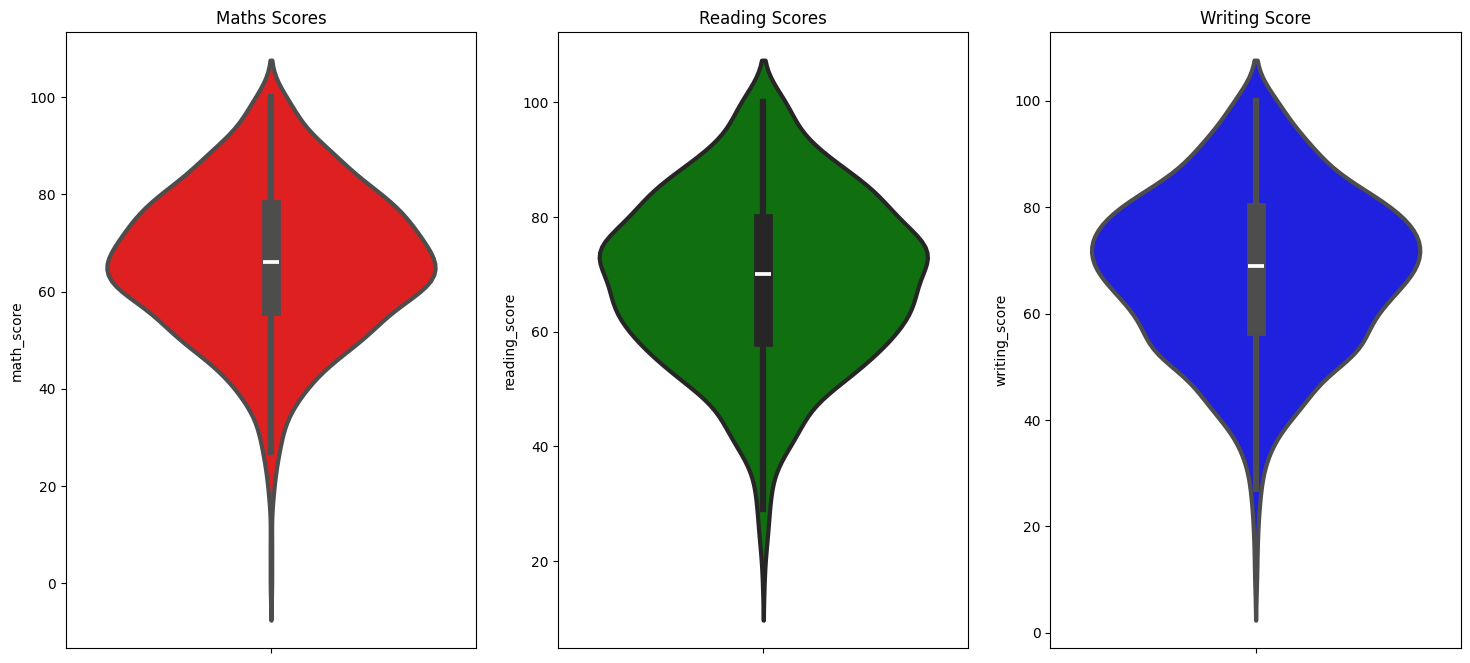

In [40]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.title('Maths Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

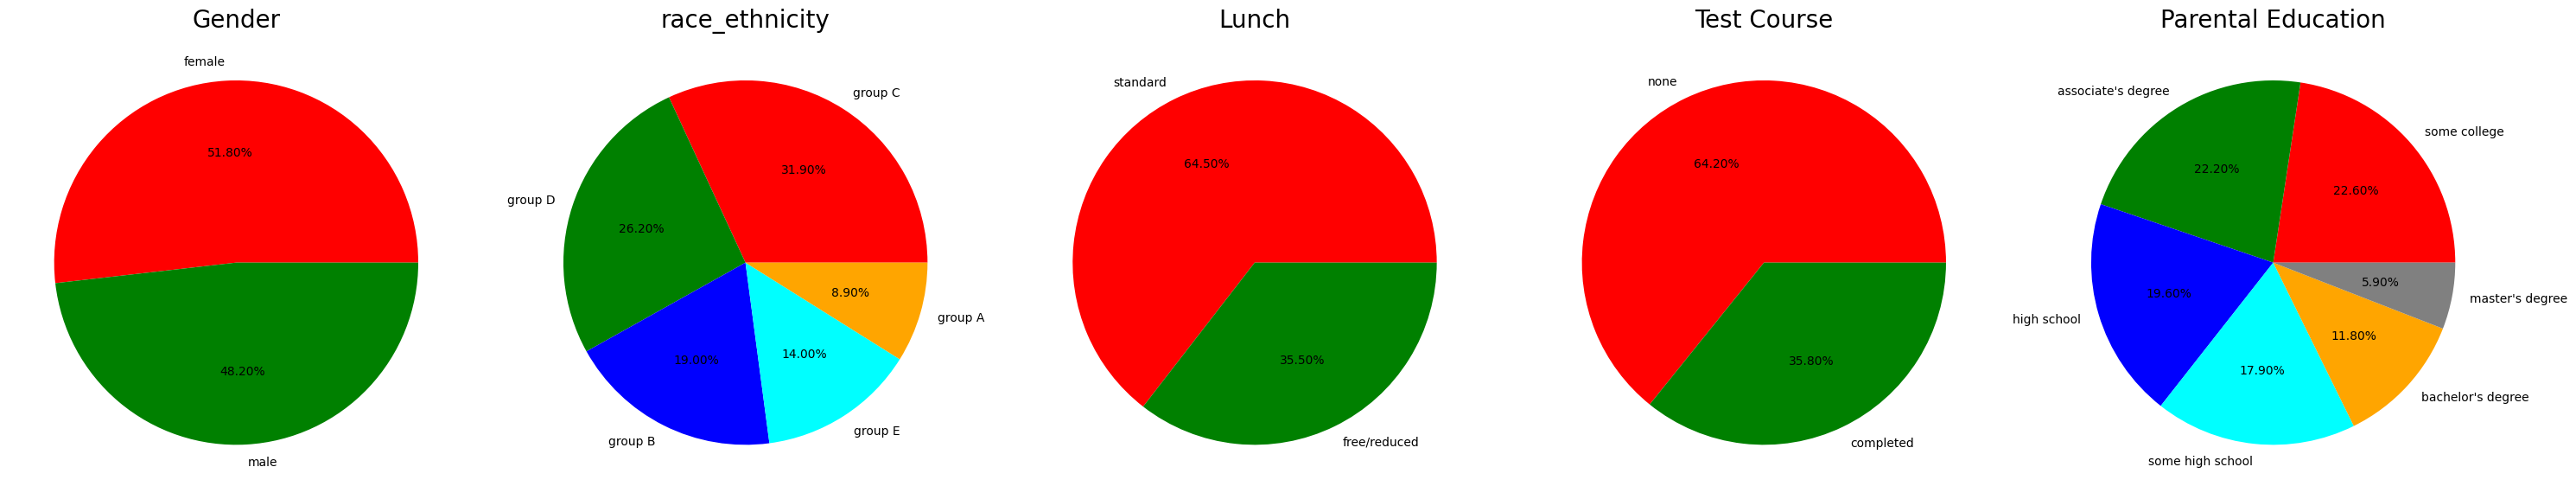

In [43]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

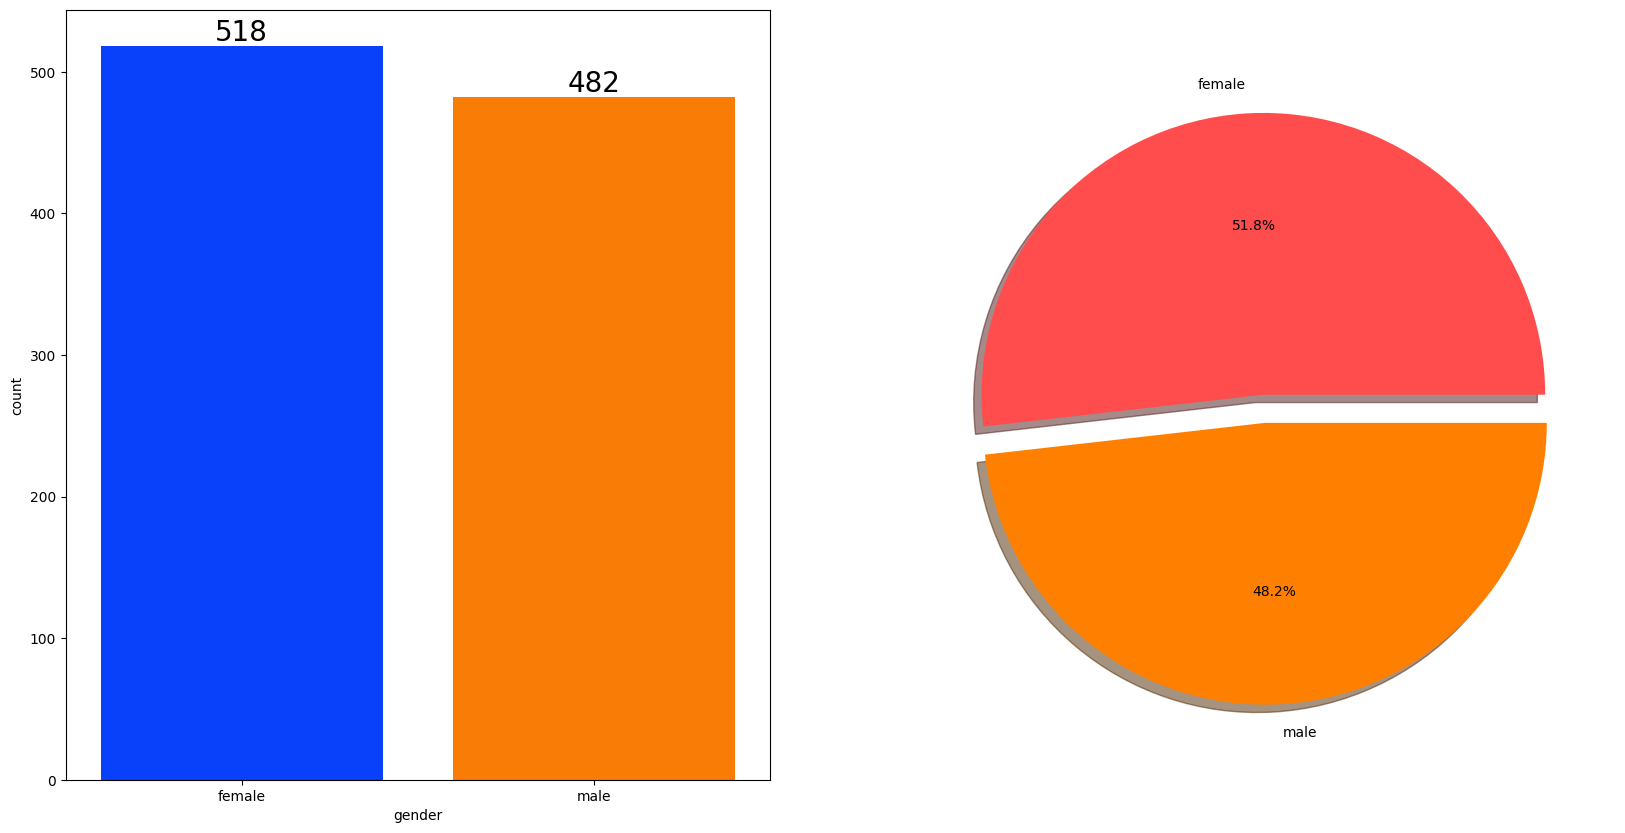

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='gender',data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
ax[1].pie(
    x=df['gender'].value_counts(),
    labels=df['gender'].value_counts().index,
    explode=[0,0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d','#ff8000']
)
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [48]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


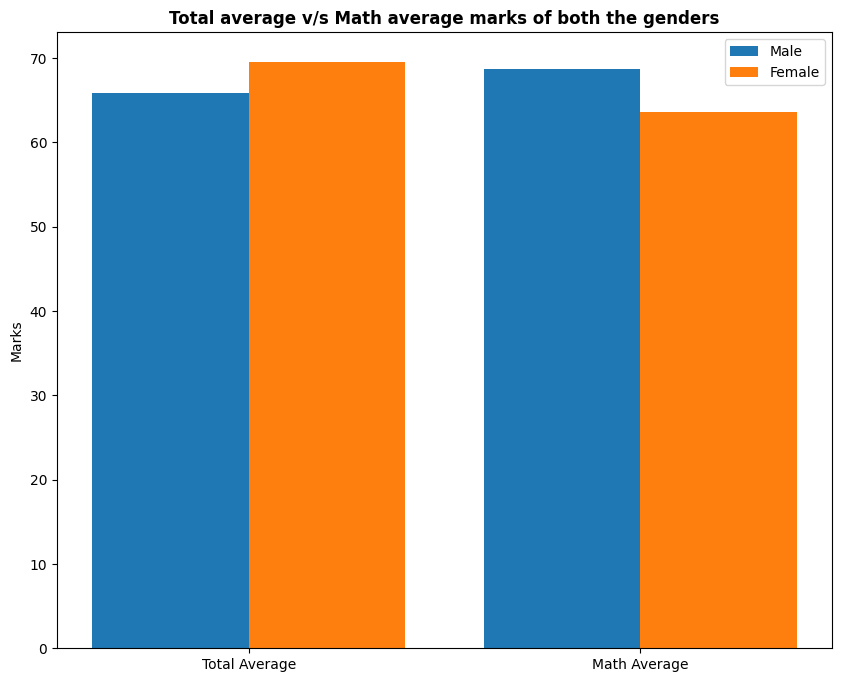

In [49]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

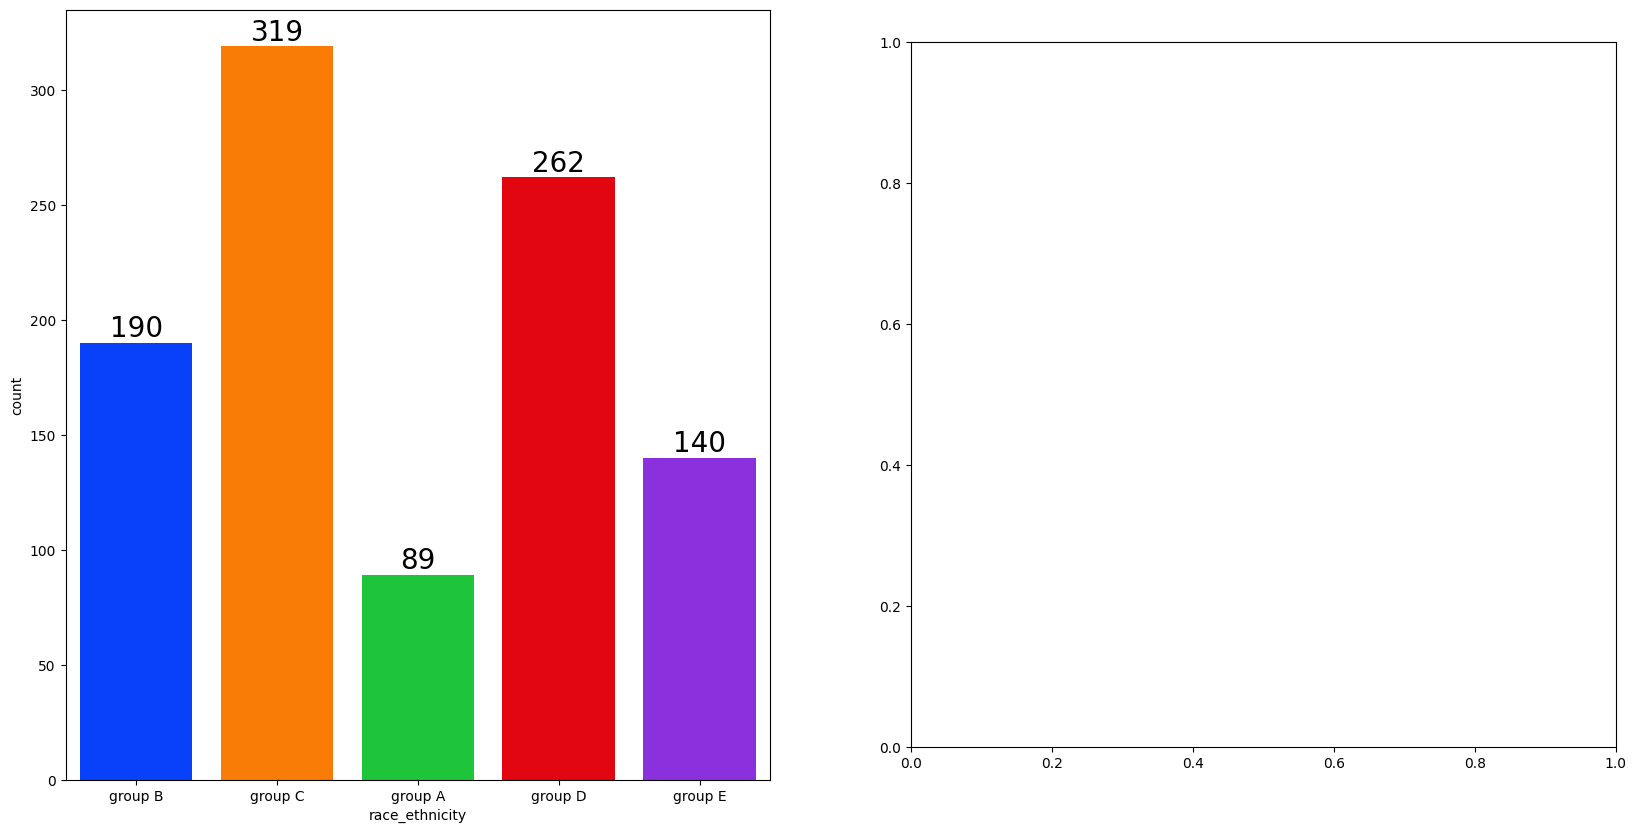

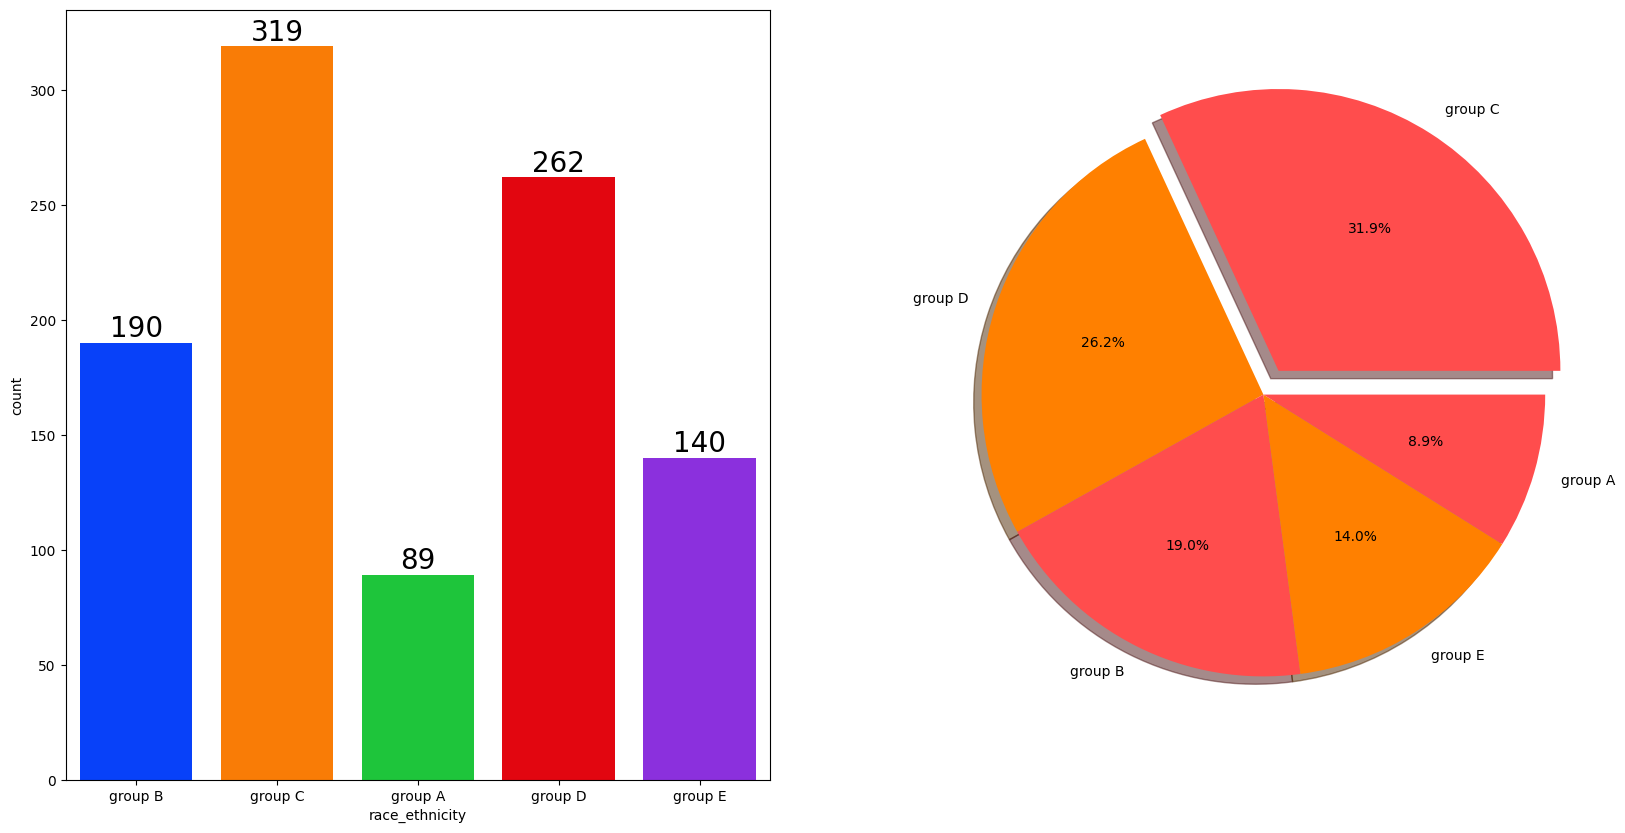

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='race_ethnicity',data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
ax[1].pie(
    x=df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1,0,0,0,0],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d','#ff8000']
)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

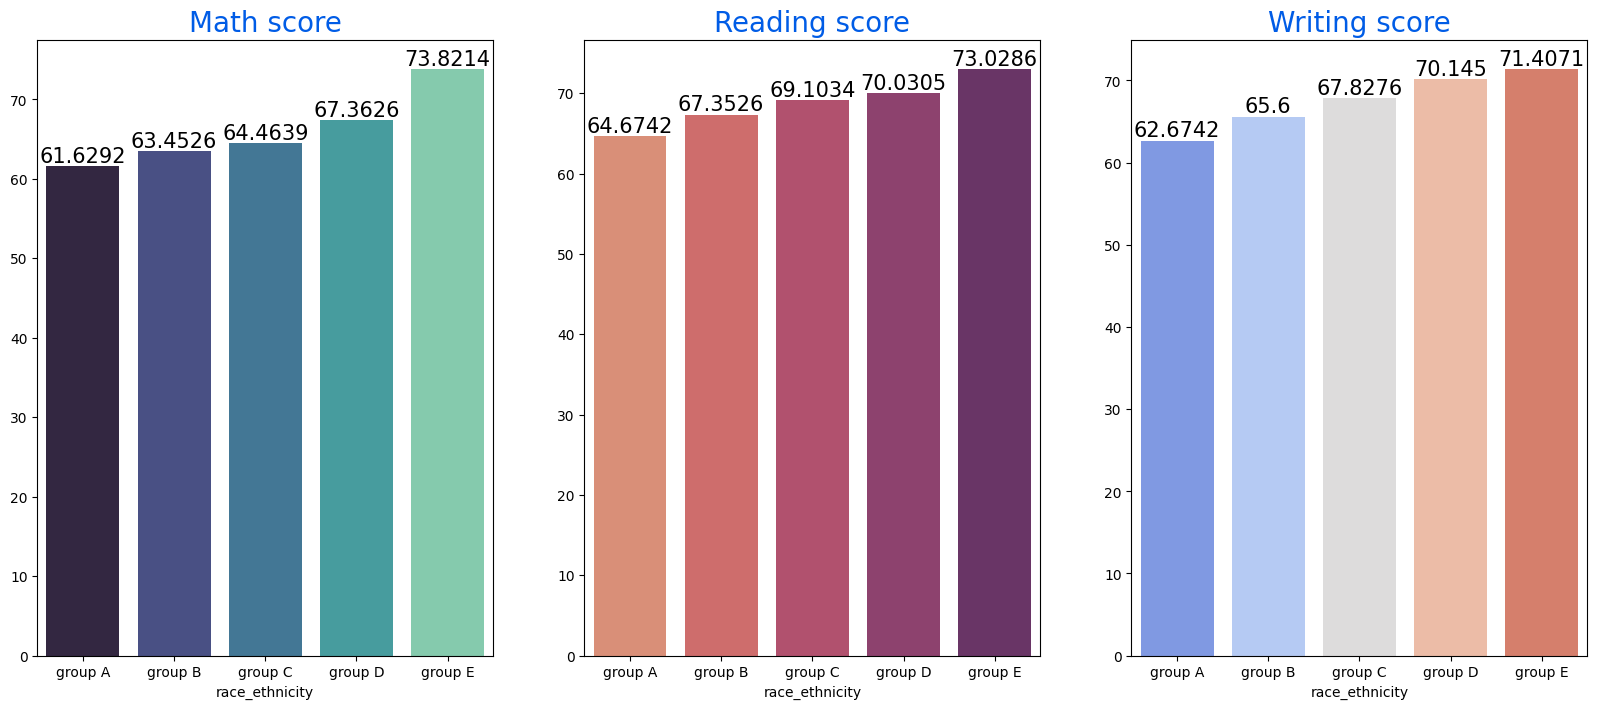

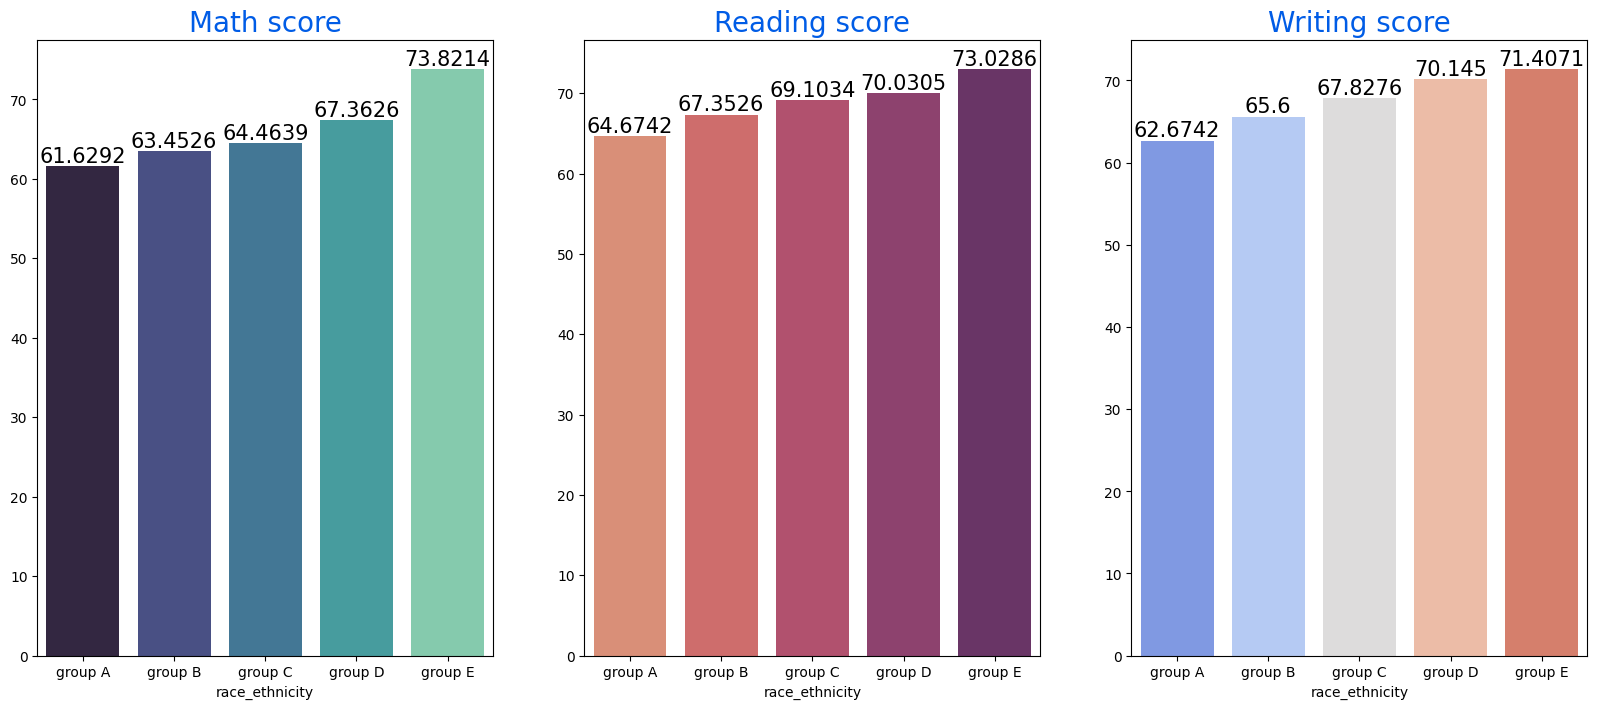

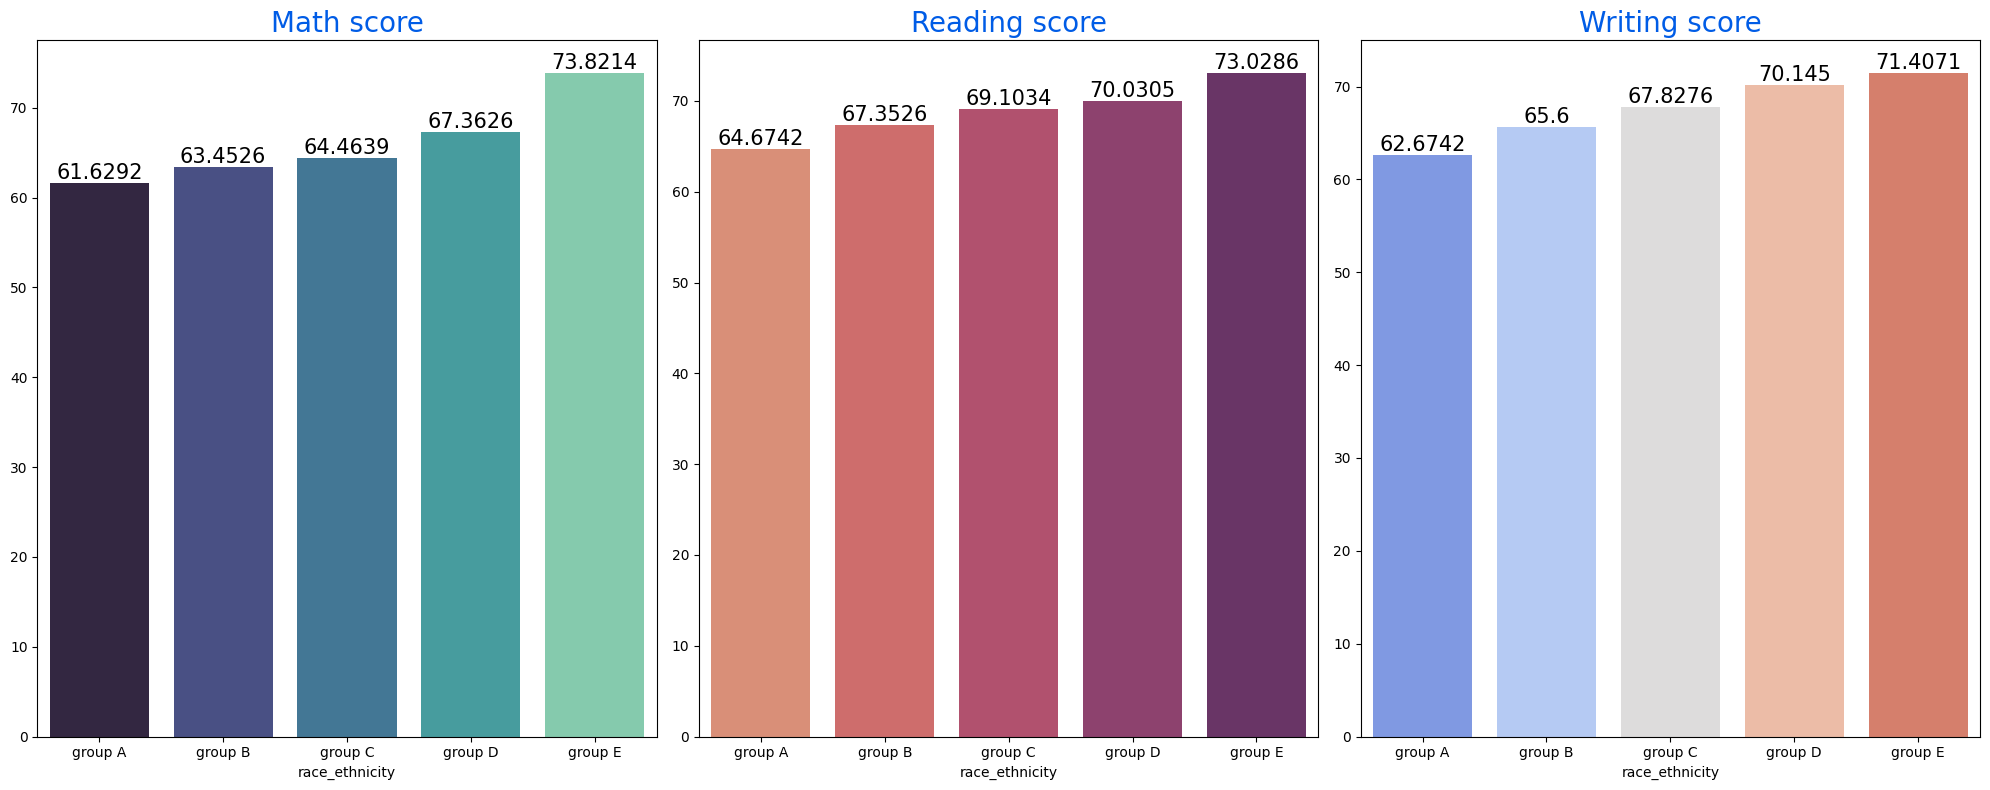

In [54]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.tight_layout()
plt.show()